# Credit defaulters identification using Logistic Regression

Introduction to the data set

German credit rating dataset contains categorical/symbolic attributes of the persons who availed the credit and the current status of the credit. The status of the credit is indicated by 1 for good credits and 2 for bad credits.

The dataset can be downloaded from UCI Repository.

https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29

The detailed description of variables can be found at the same link.

### Read the data set

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv( "germanCreditDefault.csv" )

In [4]:
data.head(2)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes


In [5]:
data.head(2).T

,0,1
checking_balance,< 0 DM,1 - 200 DM
months_loan_duration,6,48
credit_history,critical,good
purpose,furniture/appliances,furniture/appliances
amount,1169,5951
savings_balance,unknown,< 100 DM
employment_duration,> 7 years,1 - 4 years
percent_of_income,4,2
years_at_residence,4,2
age,67,22


# Build best accuracy model to find defaulters
1. Separate data into train and test sets ( 70:30). Use random seed as 7 
2. Calculate train and test accuracies
3. Print 'Confusion Matrix'
4. Calculate Precision and Recall
5. Calculate ROC-AUC

# What is the best test accuracy you have got?

## Convert categorical data to numeric data

In [6]:
data.shape

(1000, 17)

In [7]:
data_complete = pd.get_dummies(data)  ## DUmmy variable creatiom

In [8]:
data_complete.shape

(1000, 46)

In [9]:
## removes first column for each categoricl value alphbeticaly (here 10 columns dropped)
data_complete = pd.get_dummies(data, drop_first=True)  
data_complete.shape

(1000, 36)

In [10]:
data_complete.columns

Index(['months_loan_duration', 'amount', 'percent_of_income',
       'years_at_residence', 'age', 'existing_loans_count', 'dependents',
       'checking_balance_< 0 DM', 'checking_balance_> 200 DM',
       'checking_balance_unknown', 'credit_history_good',
       'credit_history_perfect', 'credit_history_poor',
       'credit_history_very good', 'purpose_car', 'purpose_car0',
       'purpose_education', 'purpose_furniture/appliances',
       'purpose_renovations', 'savings_balance_500 - 1000 DM',
       'savings_balance_< 100 DM', 'savings_balance_> 1000 DM',
       'savings_balance_unknown', 'employment_duration_4 - 7 years',
       'employment_duration_< 1 year', 'employment_duration_> 7 years',
       'employment_duration_unemployed', 'other_credit_none',
       'other_credit_store', 'housing_own', 'housing_rent', 'job_skilled',
       'job_unemployed', 'job_unskilled', 'phone_yes', 'default_yes'],
      dtype='object')

In [11]:
data_complete.groupby(["default_yes"]).count

<bound method DataFrameGroupBy.count of <pandas.core.groupby.groupby.DataFrameGroupBy object at 0x000001A1EDDE62E8>>

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, auc

In [13]:
X = data_complete.drop("default_yes", axis=1)
y = data_complete["default_yes"]
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [14]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\Mangesh Karande\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
model_score = model.score(X_test, y_test)
model_score

0.79

In [16]:
y_predict = model.predict(X_test)

In [17]:
sum(y_test)

83

In [18]:
metrics.confusion_matrix(y_test, y_predict)

array([[196,  21],
       [ 42,  41]], dtype=int64)

In [19]:
from sklearn.metrics import roc_curve, auc
y_predictProb = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_predictProb[::,1])

In [20]:
roc_auc = auc(fpr, tpr)
roc_auc

0.8118372105935261

In [21]:
# importing ploting libraries
import matplotlib.pyplot as plt   
#importing seaborn for statistical plots
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

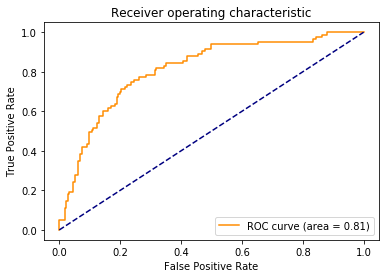

In [22]:
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [23]:
roc_auc = auc(fpr, tpr)
roc_auc

0.8118372105935261

In [24]:
optimalThreshold = 0
optimalF1 = 0
optimalRecall = 0
optimalPrecision = 0
optimalAccuracy = 0

In [25]:
for threshold in thresholds:
    preds = np.where(model.predict_proba(X_test)[:,1] > threshold, 1, 0)
    accuracy = accuracy_score(y_test, preds)
    recall = recall_score(y_test, preds)
    precision = precision_score(y_test, preds)
    F1 = 2*(precision*recall)/(precision + recall)
    if(F1 > optimalF1):
        optimalThreshold = threshold
        optimalF1 = F1
        optimalRecall = recall
        optimalPrecision = precision
        optimalAccuracy = accuracy

C:\Users\Mangesh Karande\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Mangesh Karande\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
C:\Users\Mangesh Karande\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Mangesh Karande\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


In [26]:
optimalThreshold

0.35611513546736207

In [27]:
optimalF1

0.631578947368421

In [28]:
optimalRecall

0.7228915662650602

In [29]:
optimalPrecision

0.5607476635514018

In [30]:
optimalAccuracy

0.7666666666666667

# ----------- For New Customer  ----------------

In [31]:
y_predict = np.where(model.predict_proba(X_test)[:,1] > optimalThreshold, 1, 0)
y_predict

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0])

In [32]:
metrics.confusion_matrix(y_test, y_predict)

array([[170,  47],
       [ 23,  60]], dtype=int64)

In [33]:
X_test.head(5)

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,checking_balance_< 0 DM,checking_balance_> 200 DM,checking_balance_unknown,...,employment_duration_> 7 years,employment_duration_unemployed,other_credit_none,other_credit_store,housing_own,housing_rent,job_skilled,job_unemployed,job_unskilled,phone_yes
778,36,5711,4,2,38,2,1,0,0,1,...,1,0,1,0,1,0,0,0,0,1
334,24,4110,3,4,23,2,2,1,0,0,...,1,0,0,0,0,1,1,0,0,0
271,12,1402,3,4,37,1,1,0,0,1,...,0,0,1,0,0,1,1,0,0,1
802,20,4272,1,4,24,2,1,1,0,0,...,1,0,1,0,1,0,1,0,0,0
216,18,3104,3,1,31,1,1,1,0,0,...,0,0,0,0,1,0,1,0,0,1


In [34]:
newCustomer = pd.DataFrame(X_test.loc[778]).T

In [35]:
model.predict_proba(newCustomer)

array([[0.87945824, 0.12054176]])

In [36]:
np.where(model.predict_proba(newCustomer)[:,1] > optimalThreshold, 1, 0)

array([0])

# The newCustomer is labeled as zero, so he is credit worthy

# Summery of all regression steps with user defined function:

In [39]:
def classRegModel(model, X_test, y_test):
    optimalThreshold = 0
    optimalF1 = 0
    optimalRecall = 0
    optimalPrecision = 0
    optimalAccuracy = 0
    y_predictProb = model.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_predictProb[::,1])
    roc_auc = auc(fpr,tpr)

for threshold in thresholds:
    preds = np.where(model.predict_proba(X_test)[:,1] > threshold, 1, 0)
    accuracy = accuracy_score(y_test, preds)
    recall = recall_score(y_test, preds)
    precision = precision_score(y_test, preds)
    F1 = 2*(precision*recall)/(precision + recall)
    if(F1 > optimalF1):
        optimalThreshold = threshold
        optimalF1 = F1
        optimalRecall = recall
        optimalPrecision = precision
        optimalAccuracy = accuracy
        
y_predict = np.where(model.predict_proba(X_test)[:,1] > optimalThreshold, 1, 0)
y_predict

C:\Users\Mangesh Karande\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Mangesh Karande\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()
C:\Users\Mangesh Karande\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Mangesh Karande\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


array([0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0])